## Text Preprocessing
1. Cleaning
2. Stop word removal
3. Lemmatization
4. Numeric representation

## Setup
##### Install required text processing libraries

In [1]:
!pip install nltk

import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatiseer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Creating Text Representations
#### Text data needs to be converted to numeric representation before they can be used to train deep learning models. The Spam classification feature data is converted to TF-IDF vectors and the target variable is converted to one-hot encoding.

In [2]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

# Load spam data and review content
spam_data =  pd.read_csv('/content/spam.csv', encoding='latin-1')
spam_data = spam_data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

print("\nLoaded Data :\n----------------")
print(spam_data.head())

# Separate feature and target data
spam_classes_raw = spam_data['v1']
spam_messages_raw = spam_data['v2']



Loaded Data :
----------------
     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
from re import X
import nltk
import tensorflow as tf


# Custom tokenizer to remove stopwords and use lemmatization
def customtokenize(str):
  # Split string into tokens
  tokens = nltk.word_tokenize(str)
  # Remove stop words
  nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
  # Perform lemmatization
  lemmatizer = WordNetLemmatizer()
  lemmatized = [lemmatizer.lemmatize(word) for word in nostop]
  return lemmatized

from sklearn.feature_extraction.text import TfidfVectorizer

# Build a TF-IDF Vectorizer model
vectorizer = TfidfVectorizer(tokenizer=customtokenize)

# Transform feature input to TF-IDF
tfidf = vectorizer.fit_transform(spam_messages_raw)

# Convert TF-IDF to numpy array
tfidf_array = tfidf.toarray()

# Build a label encoder for target variable to convert strings to numeric values.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
spam_classes = label_encoder.fit_transform(spam_classes_raw)

# Convert target to one-hot encoding vector
spam_classes = tf.keras.utils.to_categorical(spam_classes, 2)

print('TF-IDF Matrix Shape :\n---------------------',tfidf.shape)
print("One-hot Encoding Shpae :\n------------------", spam_classes.shape)

X_train, X_test, y_train, y_test = train_test_split(tfidf_array, spam_classes, test_size=0.1, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF Matrix Shape :
--------------------- (5572, 8832)
One-hot Encoding Shpae :
------------------ (5572, 2)


In [5]:
from tensorflow import keras
# from tensorflow.keras import optimizers
# from tensorflow.keras.regularizers import l2

# Setup Hyper Parameters for building the model
NB_CLASSES = 2
N_HIDDEN = 32

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, input_shape=(X_train.shape[1],), name =
                                'Hidden-Layer-1', activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, name =
                                'Hidden-Layer-2', activation='relu'))
model.add(keras.layers.Dense(NB_CLASSES, name =
                                'Output-Layer', activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)               │ (None, 32)                  │         282,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden-Layer-2 (Dense)               │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output-Layer (Dense)                 │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 283,778 (1.08 MB)

 Trainable params: 283,778 (1.08 MB)

 Non-trainable params: 0 (0.00 B)


Training Progress:
-------------------------
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.7369 - loss: 0.6634 - val_accuracy: 0.8624 - val_loss: 0.5727
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8640 - loss: 0.5395 - val_accuracy: 0.8624 - val_loss: 0.4514
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8588 - loss: 0.4197 - val_accuracy: 0.8624 - val_loss: 0.3473
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8721 - loss: 0.3127 - val_accuracy: 0.8933 - val_loss: 0.2636
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9198 - loss: 0.2186 - val_accuracy: 0.9272 - val_loss: 0.2006
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9639 - loss: 0.1532 - val_accuracy: 0.9492 - val_loss: 0.1560
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9724 - loss: 0.1175 - val_accuracy: 0.9661 - val_loss: 0.1242
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0

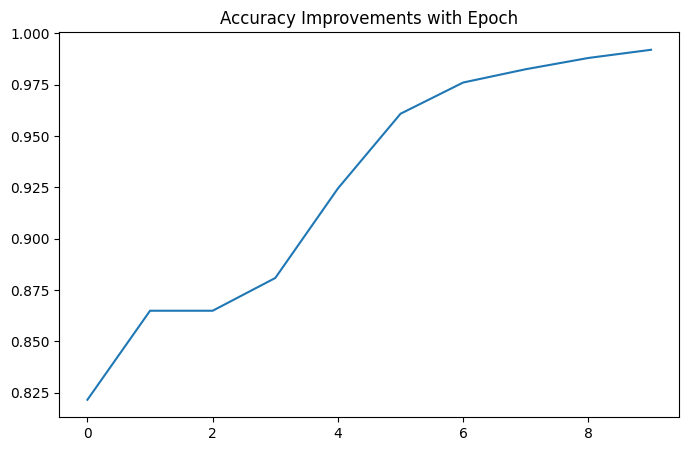


Evaluation against Test Dataset :
--------------------------
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9767 - loss: 0.0637


[0.07370554655790329, 0.9767025113105774]

In [7]:
# make it verbose so we can see the progress
VERBOSE=1

# Setup Hyper Parameters for training
BATCH_SIZE=256
EPOCHS=10
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n-------------------------")
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=VERBOSE,
                    validation_split=VALIDATION_SPLIT)
print("\nAccuracy during Training : \n---------------------------")
import matplotlib.pyplot as plt

pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
plt.title('Accuracy Improvements with Epoch')
plt.show()

print("\nEvaluation against Test Dataset :\n--------------------------")
model.evaluate(X_test, y_test)

## Predicting for Text

In [10]:
# Predict for multiple samples using batch processing

# Convert input inot IF-IDF vecotry using the same vectorizer model
predict_tfidf=vectorizer.transform(["FREE entry to a fun contest", "Yup I will come over", "You are eligible for a $500 dollar gift certificate. Click here for more details.", "Your man is not my problem.","The party starts at 10."]).toarray()

print(predict_tfidf.shape)

# Predict using model
prediction=np.argmax(model.predict(predict_tfidf), axis=1)
print("Prediction Ouptut: ", prediction)

# Print prediction classes
print("Prediction Classes are ", label_encoder.inverse_transform(prediction))

(5, 8832)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Prediction Ouptut:  [1 0 0 0 0]
Prediction Classes are  ['spam' 'ham' 'ham' 'ham' 'ham']
